# ADS Capstone Project: Airbnb Pricing Prediction
#### By Renetta Nelson, Michael Nguyen and Jacqueline Urenda

# Data Preparation

***Note: Will be adding into the proper loading of csv files once we're able to figure out how to add large files into Github***

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [82]:
!pip install tabulate

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

## Preparing the calendar dataset:

In [3]:
calendar = pd.read_csv('calendar-9-18-22.csv')
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,$225.00,$225.00,4.0,365.0
1,29967,2022-09-19,f,$225.00,$225.00,4.0,365.0
2,29967,2022-09-20,f,$225.00,$225.00,4.0,365.0
3,29967,2022-09-21,f,$225.00,$225.00,4.0,365.0
4,29967,2022-09-22,f,$225.00,$225.00,4.0,365.0


In [4]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

Converting the data types into the correct format:

In [5]:
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])

calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

In [6]:
#Converting the date column into the correct data formart

calendar['date'] = pd.to_datetime(calendar['date'])

In [7]:

calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,5.173672e+06,5.170977e+06,5.170977e+06,5.167851e+06,5.167851e+06
mean,1.598379e+17,3.963504e+02,3.947934e+02,7.522396e+00,3.040892e+05
std,2.767907e+17,1.185625e+03,1.183286e+03,2.055726e+01,2.552146e+07
min,2.996700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.501354e+07,1.250000e+02,1.250000e+02,2.000000e+00,3.650000e+02
50%,4.540952e+07,2.110000e+02,2.110000e+02,3.000000e+00,1.125000e+03
75%,5.223218e+17,3.990000e+02,3.990000e+02,5.000000e+00,1.125000e+03
max,7.181068e+17,1.000000e+05,1.000000e+05,9.990000e+02,2.147484e+09


"price" and "adjusted_price" features are the same based on the descriptive statistics. One of these columns can be dropped.

In [8]:
#deleting "adjusted_price" column from the dataset:

del calendar['adjusted_price']
calendar.head(3)

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,4.0,365.0


Resolving null values in the dataset:

In [9]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price             2695
minimum_nights    5821
maximum_nights    5821
dtype: int64

In [10]:
#imputing the pricing null values with the mean

calendar['price'] = calendar['price'].fillna(calendar['price'].mean())

In [11]:
#imputing min and max nights with the mode
calendar['minimum_nights'] = calendar['minimum_nights'].fillna(calendar['minimum_nights'].mode()[0])

calendar['maximum_nights'] = calendar['maximum_nights'].fillna(calendar['maximum_nights'].mode()[0])

In [12]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

 Converting categorical feature "available" to numeric

In [13]:
#Converting "available" feature to numeric

calendar['available'] = pd.factorize(calendar['available'])[0]

calendar.head(3)

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,0,225.0,4.0,365.0
1,29967,2022-09-19,0,225.0,4.0,365.0
2,29967,2022-09-20,0,225.0,4.0,365.0


"f" categorical variable converted numerically to 0. "t" categorical variable converted numerically to 1

## Preparing the San Diego Weather Dataset:

In [14]:
weather = pd.read_csv('SD_Weather_Data2.csv')

weather.head(3)

,Date,Precip,Max Temp,Min Temp
0,20220918,0,76.0,59.0
1,20220919,0,78.0,57.0
2,20220920,0,80.0,58.0


Converting the Date column into proper Date format:

In [15]:
#Converting the date column into the correct data formart


def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m%d')
    except ValueError:
        return pd.NaT
weather['Date'] = weather['Date'].apply(convert_date)

weather.head()


,Date,Precip,Max Temp,Min Temp
0,2022-09-18,0,76.0,59.0
1,2022-09-19,0,78.0,57.0
2,2022-09-20,0,80.0,58.0
3,2022-09-21,0,79.0,62.0
4,2022-09-22,0,81.0,56.0


Resolving the null values in the dataset:

In [16]:
weather.isnull().sum()

Date        27
Precip      26
Max Temp    27
Min Temp    27
dtype: int64

In [17]:
#Dropping Null Vaues in the Dataset

weather = weather.dropna()

In [18]:
weather.isnull().sum()

Date        0
Precip      0
Max Temp    0
Min Temp    0
dtype: int64

Converting the "Precip" feature to float:

In [19]:
# Convert decimal column to float

weather["Precip"] = weather["Precip"].astype(float)

weather.dtypes

Date        datetime64[ns]
Precip             float64
Max Temp           float64
Min Temp           float64
dtype: object

#### Feature Engineering:

Creating an average daily temperature feature:

In [20]:
weather['average_temp'] = weather[['Max Temp', 'Min Temp']].mean(axis=1)

weather.head()

,Date,Precip,Max Temp,Min Temp,average_temp
0,2022-09-18,0.0,76.0,59.0,67.5
1,2022-09-19,0.0,78.0,57.0,67.5
2,2022-09-20,0.0,80.0,58.0,69.0
3,2022-09-21,0.0,79.0,62.0,70.5
4,2022-09-22,0.0,81.0,56.0,68.5


In [21]:
#renaming the columbs to have same format as other datasets:

weather.rename(columns = {'Date':'date', 'Precip':'precip', 'Max Temp':'max_temp', 'Min Temp': 'min_temp'}, inplace = True)

In [22]:
weather.head()

,date,precip,max_temp,min_temp,average_temp
0,2022-09-18,0.0,76.0,59.0,67.5
1,2022-09-19,0.0,78.0,57.0,67.5
2,2022-09-20,0.0,80.0,58.0,69.0
3,2022-09-21,0.0,79.0,62.0,70.5
4,2022-09-22,0.0,81.0,56.0,68.5


## Preparing the Listings Dataset:

In [23]:
listings = pd.read_csv('listings-9-18-22.csv')

listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.91,4.80,4.76,NaN,f,5,5,0,0,0.59
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.79,4.61,4.40,NaN,f,3,0,3,0,1.02
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.81,4.89,4.69,NaN,t,2,2,0,0,1.20


Dataset has a lot of features that needs to be reduced

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14188 entries, 0 to 14187
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14188 non-null  int64  
 1   listing_url                                   14188 non-null  object 
 2   scrape_id                                     14188 non-null  int64  
 3   last_scraped                                  14188 non-null  object 
 4   source                                        14188 non-null  object 
 5   name                                          14188 non-null  object 
 6   description                                   14060 non-null  object 
 7   neighborhood_overview                         9306 non-null   object 
 8   picture_url                                   14188 non-null  object 
 9   host_id                                       14188 non-null 

In [25]:
#dropping initial unneccesary features: 

drop_columns = ['listing_url', 'scrape_id','source', 'name', 'description', 
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
         'host_about', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
         'host_thumbnail_url','host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'last_scraped', 'host_picture_url', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'bathrooms', 'amenities', 'price']

listings = listings.drop(columns=drop_columns)

Resolving Null Values:

In [26]:
listings.isnull().sum()

id                                0
host_is_superhost                13
host_neighbourhood             2057
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    4
bedrooms                       1273
beds                            161
number_of_reviews                 0
review_scores_rating           1665
review_scores_accuracy         1686
review_scores_cleanliness      1686
review_scores_checkin          1688
review_scores_communication    1686
review_scores_location         1688
review_scores_value            1688
instant_bookable                  0
dtype: int64

In [27]:
#dropping null values for missing review scores and bathroom text



listings.dropna(subset=['host_is_superhost', 'host_neighbourhood', 'review_scores_rating', 'review_scores_accuracy','review_scores_communication', 'review_scores_location', 'bathrooms_text'], inplace=True)

listings.head()

,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,29967,f,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,4.76,4.75,4.55,4.91,4.91,4.80,4.76,f
1,38245,f,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,4.33,4.35,4.22,4.72,4.79,4.61,4.40,f
2,108349,t,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,4.75,4.79,4.55,4.88,4.81,4.89,4.69,t
3,126344,t,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,4.72,4.77,4.73,4.88,4.81,4.78,4.65,t
4,54001,t,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,4.94,4.92,4.95,4.97,4.98,4.97,4.89,f


In [28]:
#imputing bedrooms and beds with the mode
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])

listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])

In [29]:
listings.isnull().sum()

id                             0
host_is_superhost              0
host_neighbourhood             0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [30]:
#Converting "host_is_superhost" feature to numeric

listings['host_is_superhost'] = pd.factorize(listings['host_is_superhost'])[0]


"f" categorical variable converted numerically to 0. "t" categorical variable converted numerically to 1

0 means host isn't a superhost, 1 means host is a superhost

In [31]:
#Converting "instant_bookable" feature to numeric

listings['instant_bookable'] = pd.factorize(listings['instant_bookable'])[0]

listings.head(5)

,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,4.76,4.75,4.55,4.91,4.91,4.80,4.76,0
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,4.33,4.35,4.22,4.72,4.79,4.61,4.40,0
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,4.75,4.79,4.55,4.88,4.81,4.89,4.69,1
3,126344,1,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,4.72,4.77,4.73,4.88,4.81,4.78,4.65,1
4,54001,1,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,4.94,4.92,4.95,4.97,4.98,4.97,4.89,0


"f" categorical variable converted numerically to 0. "t" categorical variable converted numerically to 1

0 means listing isn't instant bookable, 1 means listing is instant bookable

In [32]:
listings['bathroom'] = listings.bathrooms_text.str.extract('(\d+)')



listings.head()

,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,4.76,4.75,4.55,4.91,4.91,4.80,4.76,0,2
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,4.33,4.35,4.22,4.72,4.79,4.61,4.40,0,1
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,4.75,4.79,4.55,4.88,4.81,4.89,4.69,1,2
3,126344,1,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,4.72,4.77,4.73,4.88,4.81,4.78,4.65,1,2
4,54001,1,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,4.94,4.92,4.95,4.97,4.98,4.97,4.89,0,1


In [33]:
listings.isna().sum()

id                             0
host_is_superhost              0
host_neighbourhood             0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
bathroom                       7
dtype: int64

In [34]:
#converting the bathroom column to float


listings["bathroom"] = listings["bathroom"].astype(float)

In [35]:
#imputng bathroom null values with mean

listings['bathroom'] = listings['bathroom'].fillna(listings['bathroom'].mean())

In [36]:
listings.nunique()

id                             10645
host_is_superhost                  2
host_neighbourhood               340
property_type                     63
room_type                          4
accommodates                      16
bathrooms_text                    35
bedrooms                          12
beds                              23
number_of_reviews                492
review_scores_rating             146
review_scores_accuracy           144
review_scores_cleanliness        160
review_scores_checkin            129
review_scores_communication      127
review_scores_location           135
review_scores_value              152
instant_bookable                   2
bathroom                          12
dtype: int64

Label Encoding host neighborhood, property type, room type, 

In [37]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
listings['host_neighbourhood_cat'] = labelencoder.fit_transform(listings['host_neighbourhood'])
listings.head()


,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,4.76,4.75,4.55,4.91,4.91,4.80,4.76,0,2.0,219
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,4.33,4.35,4.22,4.72,4.79,4.61,4.40,0,1.0,167
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,4.75,4.79,4.55,4.88,4.81,4.89,4.69,1,2.0,219
3,126344,1,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,4.72,4.77,4.73,4.88,4.81,4.78,4.65,1,2.0,219
4,54001,1,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,4.94,4.92,4.95,4.97,4.98,4.97,4.89,0,1.0,147


In [38]:

# Assigning numerical values and storing in another column
listings['property_type_cat'] = labelencoder.fit_transform(listings['property_type'])
listings.head()

,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat,property_type_cat
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,...,4.75,4.55,4.91,4.91,4.80,4.76,0,2.0,219,7
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,...,4.35,4.22,4.72,4.79,4.61,4.40,0,1.0,167,35
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,...,4.79,4.55,4.88,4.81,4.89,4.69,1,2.0,219,19
3,126344,1,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,...,4.77,4.73,4.88,4.81,4.78,4.65,1,2.0,219,13
4,54001,1,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,...,4.92,4.95,4.97,4.98,4.97,4.89,0,1.0,147,12


In [39]:
# Assigning numerical values and storing in another column
listings['room_type_cat'] = labelencoder.fit_transform(listings['room_type'])
listings.head()

,id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat,property_type_cat,room_type_cat
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,...,4.55,4.91,4.91,4.80,4.76,0,2.0,219,7,0
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,...,4.22,4.72,4.79,4.61,4.40,0,1.0,167,35,2
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,...,4.55,4.88,4.81,4.89,4.69,1,2.0,219,19,0
3,126344,1,Pacific Beach,Entire home,Entire home/apt,8,2 baths,3.0,6.0,183,...,4.73,4.88,4.81,4.78,4.65,1,2.0,219,13,0
4,54001,1,La Jolla,Entire guesthouse,Entire home/apt,3,1 bath,2.0,3.0,296,...,4.95,4.97,4.98,4.97,4.89,0,1.0,147,12,0


In [40]:
#creating a lookup list for converted categorical variablles

host_neihborhoods = listings[['host_neighbourhood', 'host_neighbourhood_cat']]
host_neihborhoods.drop_duplicates()


host_neihborhoods.head(3)


,host_neighbourhood,host_neighbourhood_cat
0,Pacific Beach,219
1,Loma Portal,167
2,Pacific Beach,219


In [41]:
property_type = listings[['property_type', 'property_type_cat']]
property_type.drop_duplicates()

property_type.head(3)

,property_type,property_type_cat
0,Entire bungalow,7
1,Private room in home,35
2,Entire townhouse,19


In [42]:
room_type = listings[['room_type', 'room_type_cat']]
room_type.drop_duplicates()

room_type.head(3)

,room_type,room_type_cat
0,Entire home/apt,0
1,Private room,2
2,Entire home/apt,0


Dropping additional columns from the dataset:

In [43]:
#drop_columns2 = ['host_neighbourhood','property_type','room_type', 'bathrooms_text']

#listings = listings.drop(columns=drop_columns2)

In [44]:
#renaning the "id" column to "listing_id"

listings.rename(columns = {'id':'listing_id'}, inplace = True)


listings.head(3)

,listing_id,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat,property_type_cat,room_type_cat
0,29967,0,Pacific Beach,Entire bungalow,Entire home/apt,8,2 baths,2.0,3.0,88,...,4.55,4.91,4.91,4.80,4.76,0,2.0,219,7,0
1,38245,0,Loma Portal,Private room in home,Private room,1,1 shared bath,1.0,1.0,149,...,4.22,4.72,4.79,4.61,4.40,0,1.0,167,35,2
2,108349,1,Pacific Beach,Entire townhouse,Entire home/apt,7,2.5 baths,3.0,5.0,162,...,4.55,4.88,4.81,4.89,4.69,1,2.0,219,19,0


In [45]:
%store calendar
%store weather
%store listings

Stored 'calendar' (DataFrame)
Stored 'weather' (DataFrame)
Stored 'listings' (DataFrame)


## Combining the Datasets

In [46]:
final_df = pd.merge(calendar, weather)

In [47]:
final_df = pd.merge(calendar,weather)

In [48]:
final_df = pd.merge(final_df, listings)

In [49]:
final_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,precip,max_temp,min_temp,average_temp,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat,property_type_cat,room_type_cat
0,29967,2022-09-18,0,225.0,4.0,365.0,0.0,76.0,59.0,67.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
1,29967,2022-09-19,0,225.0,4.0,365.0,0.0,78.0,57.0,67.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
2,29967,2022-09-20,0,225.0,4.0,365.0,0.0,80.0,58.0,69.0,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
3,29967,2022-09-21,0,225.0,4.0,365.0,0.0,79.0,62.0,70.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
4,29967,2022-09-22,0,225.0,4.0,365.0,0.0,81.0,56.0,68.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0


In [50]:
final_df.shape

(3882606, 31)

In [51]:
%store final_df
#final_df.to_csv('/Users/jackieurenda/Downloads/sd_airbnb.csv')

Stored 'final_df' (DataFrame)


## Preparing the final dataset for modeling:

In [52]:
#dropping non-numerical columns

drop_columns2 = ['host_neighbourhood','property_type','room_type', 'bathrooms_text']

final_df2 = final_df.drop(columns=drop_columns2)

In [53]:
final_df2.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,precip,max_temp,min_temp,average_temp,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom,host_neighbourhood_cat,property_type_cat,room_type_cat
0,29967,2022-09-18,0,225.0,4.0,365.0,0.0,76.0,59.0,67.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
1,29967,2022-09-19,0,225.0,4.0,365.0,0.0,78.0,57.0,67.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
2,29967,2022-09-20,0,225.0,4.0,365.0,0.0,80.0,58.0,69.0,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
3,29967,2022-09-21,0,225.0,4.0,365.0,0.0,79.0,62.0,70.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0
4,29967,2022-09-22,0,225.0,4.0,365.0,0.0,81.0,56.0,68.5,...,4.55,4.91,4.91,4.8,4.76,0,2.0,219,7,0


## Splitting the data

In [54]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [55]:
final_df2.set_index('date', inplace=True)
final_df2.sort_index(inplace=True)
X = final_df2.drop(labels=['price'], axis=1)
y = final_df2['price']

In [56]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

<Axes: xlabel='date'>

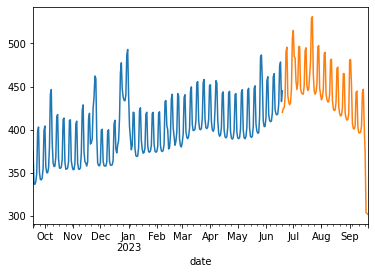

In [57]:
#plotting train and test data

y_train.groupby('date').mean().plot()
y_test.groupby('date').mean().plot()

In [59]:
#convert 
sample_indices = np.random.choice(X_train.shape[0], 5000, replace=False)
X_train_sample = X_train.iloc[sample_indices, :]
y_train_sample = y_train.iloc[sample_indices]

In [60]:
fit baseline model
baseline_rf = RandomForestRegressor(random_state=42)
baseline_rf.fit(X_train_sample, y_train_sample)

RandomForestRegressor(random_state=42)

In [61]:
#importance
importances = baseline_rf.feature_importances_

In [63]:
#sort by importance(10)
indices = np.argsort(importances)[-10:]
X_train_reduced = X_train.iloc[:, indices]

In [65]:
top_features = X_train.columns[indices]

# Select top features from the sample
X_train_sample_reduced = X_train_sample[top_features]

In [66]:
#set up hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_features = ['auto', 'sqrt']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [67]:
rf = RandomForestRegressor(random_state=42)

In [68]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [69]:
#fit random search
rf_random.fit(X_train_sample_reduced, y_train_sample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [70]:
best_params = rf_random.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30}


In [72]:
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], max_features=best_params['max_features'], random_state=42)
rf_best.fit(X_train_reduced, y_train)

RandomForestRegressor(max_depth=30, n_estimators=400, random_state=42)

In [73]:
# Reduce test set
X_test_reduced = X_test[top_features]

# Predict on test set
y_pred = rf_best.predict(X_test_reduced)

In [75]:
#mse
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Test MSE: 49695.08159226718


In [76]:
#SHAP and interpret
importances = rf_best.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": top_features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

                  Feature  Importance
2              listing_id    0.401886
9          minimum_nights    0.332864
8  host_neighbourhood_cat    0.160420
5            accommodates    0.041656
7                bedrooms    0.018130
6                bathroom    0.014212
1     review_scores_value    0.011840
0       property_type_cat    0.010397
4       number_of_reviews    0.005509
3  review_scores_location    0.003087


In [78]:
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [79]:
metrics = pd.DataFrame({"Metric": ["MSE", "RMSE", "R2", "Adjusted R2", "MAPE"],
                        "Value": [mse, rmse, r2, adjusted_r2, mape]})

In [84]:
print(tabulate(metrics))

-  -----------  ------------
0  MSE          49695.1
1  RMSE           222.924
2  R2               0.971798
3  Adjusted R2      0.971798
4  MAPE            11.7113
-  -----------  ------------
